# Ataque a una Convolutional Neuronal Network (CNN)

Lo primero que haremos será validar que el modelo funciona

In [2]:
#Import Libraries
import tensorflow as tf
import keras   #Api que funciona encima de TensorFlow

import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Keras nos ofrece el modelo pre-entrenado de Inception_V3
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [4]:
#Cargamos el modelo dentro de una variable
iv3 = InceptionV3()

Ahora lo que vamos a ver, sólo con fin ilustrativo, es la cantidad de capas que tiene el modelo y la cantidad de parámetros que la componen:<br></br> Entre más cantidad de parámetros tengamos mayor cantidad de datos serán necesarios para el proceso de optimización y reajuste de ésto parámetros

In [5]:
print(iv3.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

Vamos a importar imágenes para probar nuestro modelo:

In [6]:
from keras.preprocessing import image  #Cargar imágenes para testear nuestro modelo.  

In [28]:
x = image.load_img("../datasets/testingCNN/angry_puppy.jpg")

print(x)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=909x1024 at 0x7FBFA834C358>


<function matplotlib.pyplot.show(*args, **kw)>

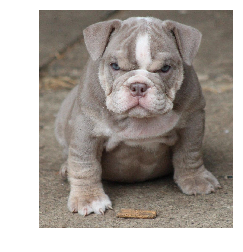

In [29]:
plt.axis("off")
plt.imshow(x)
plt.show

Lo que necesitamos es trabajar con **datos numéricos** por lo que vamos a poner éste fichero de tipo imagen representado por un matriz bidimensional o un tensor (matriz multidimensional):

In [30]:
#Creamos una matriz de valores en lugar de una imagen
x = image.img_to_array(image.load_img("../datasets/testingCNN/angry_puppy.jpg"))

print(x.shape)
#Es una imagen con(altura, ancho, 3 canales de color(RGB))

(1024, 909, 3)


Para reentrenar el modelo **Inception V3** es necesario que la matriz tenga entre sus requisitos:
1. tamaño de la imagen sea una proporción de 299x299 px
- Cambiar el rango de 0,255 a -1,1
- Pasar de 3 a 4 dimensiones el tensor, en la primera dimensión agregamos el tamaño del lote (batch size)

In [31]:
1. #Vamos a redimensionar la imagen:
x = image.img_to_array(image.load_img("../datasets/testingCNN/angry_puppy.jpg", target_size=(299,299)))

print(x.shape)

(299, 299, 3)


In [32]:
2#Cambio de rango de 0,255 => -1,1
x /= 255
x -= 0.5   #centrando los valores
x *= 2

print(x)

[[[-0.20784312 -0.27058822 -0.372549  ]
  [-0.16862744 -0.23137254 -0.3333333 ]
  [-0.16862744 -0.23137254 -0.31764704]
  ...
  [-0.21568626 -0.27843136 -0.36470586]
  [-0.21568626 -0.27843136 -0.36470586]
  [-0.21568626 -0.29411763 -0.372549  ]]

 [[-0.15294117 -0.21568626 -0.31764704]
  [-0.1607843  -0.2235294  -0.32549018]
  [-0.14509803 -0.20784312 -0.29411763]
  ...
  [-0.26274508 -0.32549018 -0.41176468]
  [-0.20784312 -0.27058822 -0.35686272]
  [-0.23137254 -0.3098039  -0.38823527]]

 [[-0.15294117 -0.21568626 -0.31764704]
  [-0.14509803 -0.20784312 -0.3098039 ]
  [-0.1372549  -0.19999999 -0.2862745 ]
  ...
  [-0.21568626 -0.27843136 -0.36470586]
  [-0.27058822 -0.3333333  -0.41960782]
  [-0.24705881 -0.32549018 -0.40392154]]

 ...

 [[ 0.10588241  0.04313731 -0.04313725]
  [ 0.1686275   0.10588241  0.0196079 ]
  [ 0.05098045 -0.01176471 -0.09803921]
  ...
  [ 0.4039216   0.35686278  0.24705887]
  [ 0.01176476 -0.03529412 -0.12941176]
  [ 0.04313731 -0.02745098 -0.09803921]]

 [

In [33]:
#Pasar de 3 a cuatro dimensiones. La primera dimensión es el bactch Size es lote de imagenes que ingresaremos
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

print(x.shape)

(1, 299, 299, 3)


Una vez lista la variable **X** como la necesitamos la ingresamos al modelo de Inception V3

In [34]:
y = iv3.predict(x)

In [35]:
#El tamaño de la variable "y" es de 1000 por el hecho que el modelo puede clasificar entre mil categorías
y.shape

(1, 1000)

Keras tiene una funcionalidad llamada `decode_predictions` que nos mapea entre todos los resultados y nos trae, en orden, las clases con probabilidades más altas y con su respectivo nombre:

#                                   FUNCIONA!!!

In [36]:
decode_predictions(y)
#Efectivamente un pastor alemán

[[('n02108915', 'French_bulldog', 0.51179254),
  ('n02108422', 'bull_mastiff', 0.13193439),
  ('n02108089', 'boxer', 0.04140415),
  ('n02093428', 'American_Staffordshire_terrier', 0.016959583),
  ('n02096585', 'Boston_bull', 0.005920342)]]

# Segundo Paso: Ataque Adversario

Ahora que vemos que el modelo funciona correctamente lo que haremos será **ROMPERLO**.<br></br> 
Un Ataque Adversario será ingresar imágenes modificadas al modelo que le genere confusión y arroje un resultado diferente. Estas modificaciones deben ser impercetibles al ojo humano.<br></br>

Lo explico mejor en https://github.com/corozb/Ataque_Adversario_a_una_CNN/blob/master/README.md

In [64]:
#Vamos a trabajar sobre la capa de entrada de datos y la capa de salida
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output #Funciona con una función Softmax al final

target_class = 951 #Que identifique un gato con la imagen de la Vespa

Construimos una función de coste que nos maximice el ERROR, es decir que maximice la capa de salida con la clase objetivo (951 = leemon)

In [65]:
loss = out_layer[0, target_class]

Cuando se quiere entrenar una red neuronal lo que necesitamos es encontrar el **gradiente** entre tu error y los parámetros eso te va a decir que valores tienes que utilizar para poco a poco ir minimizando ese error. En este caso el gradiente no lo vamos a usar sobre los parámetros sino sobre la variable de entrada definida (input_layer) que son los pixeles de la imagen

In [66]:
grad =K.gradients(loss, inp_layer)[0] #El coste con respecto al tensor de entrada

Nuestra variable "grad" hace referencia al proceso de calcular el **gradiente entre el error y la variable 
de entrada**. <br></br>
Con lo cual ya tendríamos un tensor que nos dirá en **que proporción tendremos que variar los píxeles de nuestra imagen** para que poco a poco la función de coste se **vaya optimizando**.

Una función Keras tiene la particularidad que le damos las variables de entrada y cuales son los resultados que
queremos como salida y automáticamente crea una función que nos dará el grafo necesario. <br></br>
Es necesario aclararle al modelo cuando son datos de entrenamiento y cuando datos de testeo, se usa **K.learning_phase()**

In [69]:
#Creamos una función que se ejecutará iterativa para que haga el proceso de optimización del gradiente
optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

adv = np.copy(x) #hace una copia de la variable x antes de ser modificada
                               
cost = 0.0

#Igualmente al maximizar el error, queremos minimizar la diferencia entre la imagen original y la perturbada
pert = 0.01
max_pert = x + 0.01
min_pert = x - 0.01

                                
while cost < 0.95:
    gr, cost = optimize_gradient([adv, 0]) #ponemos dos variables porque fue lo que definimos como resultado
                                           # [grad, loss] 
    adv += gr
    
    #Ponemos lo límites de la perturbación dentro de la iteración
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1) # ponemos limites a los valores de las intensidades
    
    print('Target Cost:', cost)

Target Cost: 2.7687986e-06
Target Cost: 2.7692133e-06
Target Cost: 2.7697363e-06
Target Cost: 2.7705419e-06
Target Cost: 2.7714111e-06
Target Cost: 2.7723202e-06
Target Cost: 2.773225e-06
Target Cost: 2.7741594e-06
Target Cost: 2.7750825e-06
Target Cost: 2.77601e-06
Target Cost: 2.7769602e-06
Target Cost: 2.7778822e-06
Target Cost: 2.7788271e-06
Target Cost: 2.7797414e-06
Target Cost: 2.7807005e-06
Target Cost: 2.7816384e-06
Target Cost: 2.7826068e-06
Target Cost: 2.7835536e-06
Target Cost: 2.7845235e-06
Target Cost: 2.785476e-06
Target Cost: 2.7864435e-06
Target Cost: 2.7873873e-06
Target Cost: 2.7883764e-06
Target Cost: 2.7893466e-06
Target Cost: 2.7903109e-06
Target Cost: 2.7912622e-06
Target Cost: 2.792233e-06
Target Cost: 2.7931842e-06
Target Cost: 2.7941453e-06
Target Cost: 2.7951203e-06
Target Cost: 2.7960918e-06
Target Cost: 2.7970934e-06
Target Cost: 2.7980695e-06
Target Cost: 2.7990748e-06
Target Cost: 2.8000393e-06
Target Cost: 2.8010336e-06
Target Cost: 2.8020197e-06
Target

Target Cost: 3.077116e-06
Target Cost: 3.0781732e-06
Target Cost: 3.0791973e-06
Target Cost: 3.0802473e-06
Target Cost: 3.0812719e-06
Target Cost: 3.0823003e-06
Target Cost: 3.083342e-06
Target Cost: 3.0843585e-06
Target Cost: 3.0854171e-06
Target Cost: 3.086477e-06
Target Cost: 3.0875353e-06
Target Cost: 3.0885985e-06
Target Cost: 3.0896438e-06
Target Cost: 3.0907115e-06
Target Cost: 3.0917636e-06
Target Cost: 3.0928234e-06
Target Cost: 3.093858e-06
Target Cost: 3.0949334e-06
Target Cost: 3.0960064e-06
Target Cost: 3.0970943e-06
Target Cost: 3.0981453e-06
Target Cost: 3.0992148e-06
Target Cost: 3.1002678e-06
Target Cost: 3.1013406e-06
Target Cost: 3.1024017e-06
Target Cost: 3.1034663e-06
Target Cost: 3.1045447e-06
Target Cost: 3.1056186e-06
Target Cost: 3.1066936e-06
Target Cost: 3.1077734e-06
Target Cost: 3.1088716e-06
Target Cost: 3.10994e-06
Target Cost: 3.1110571e-06
Target Cost: 3.1121629e-06
Target Cost: 3.1132702e-06
Target Cost: 3.1143632e-06
Target Cost: 3.1154639e-06
Target 

Target Cost: 3.4102584e-06
Target Cost: 3.4114476e-06
Target Cost: 3.4126365e-06
Target Cost: 3.4138184e-06
Target Cost: 3.415014e-06
Target Cost: 3.416184e-06
Target Cost: 3.4173725e-06
Target Cost: 3.4185591e-06
Target Cost: 3.4197503e-06
Target Cost: 3.4209263e-06
Target Cost: 3.4221057e-06
Target Cost: 3.4232958e-06
Target Cost: 3.424483e-06
Target Cost: 3.4256693e-06
Target Cost: 3.4268621e-06
Target Cost: 3.4280472e-06
Target Cost: 3.4292432e-06
Target Cost: 3.430443e-06
Target Cost: 3.431636e-06
Target Cost: 3.4328427e-06
Target Cost: 3.4340337e-06
Target Cost: 3.4352252e-06
Target Cost: 3.436417e-06
Target Cost: 3.4376062e-06
Target Cost: 3.438808e-06
Target Cost: 3.4399964e-06
Target Cost: 3.4411926e-06
Target Cost: 3.4424056e-06
Target Cost: 3.4436162e-06
Target Cost: 3.4448171e-06
Target Cost: 3.446025e-06
Target Cost: 3.4472314e-06
Target Cost: 3.4484171e-06
Target Cost: 3.4496497e-06
Target Cost: 3.4508575e-06
Target Cost: 3.4520594e-06
Target Cost: 3.4532684e-06
Target Co

Target Cost: 3.82839e-06
Target Cost: 3.8298836e-06
Target Cost: 3.8313974e-06
Target Cost: 3.832923e-06
Target Cost: 3.8344488e-06
Target Cost: 3.8359276e-06
Target Cost: 3.8374383e-06
Target Cost: 3.838921e-06
Target Cost: 3.8404282e-06
Target Cost: 3.841924e-06
Target Cost: 3.8434296e-06
Target Cost: 3.844929e-06
Target Cost: 3.8464163e-06
Target Cost: 3.847935e-06
Target Cost: 3.849466e-06
Target Cost: 3.8509856e-06
Target Cost: 3.8524936e-06
Target Cost: 3.8540156e-06
Target Cost: 3.8555495e-06
Target Cost: 3.8570824e-06
Target Cost: 3.858625e-06
Target Cost: 3.860145e-06
Target Cost: 3.861695e-06
Target Cost: 3.863219e-06
Target Cost: 3.864772e-06
Target Cost: 3.866298e-06
Target Cost: 3.867841e-06
Target Cost: 3.869385e-06
Target Cost: 3.8709118e-06
Target Cost: 3.8724397e-06
Target Cost: 3.8740186e-06
Target Cost: 3.8755516e-06
Target Cost: 3.8771022e-06
Target Cost: 3.8786384e-06
Target Cost: 3.8801945e-06
Target Cost: 3.881758e-06
Target Cost: 3.883322e-06
Target Cost: 3.8849

Target Cost: 4.385369e-06
Target Cost: 4.3874734e-06
Target Cost: 4.3895557e-06
Target Cost: 4.3916602e-06
Target Cost: 4.393774e-06
Target Cost: 4.395885e-06
Target Cost: 4.3980504e-06
Target Cost: 4.400159e-06
Target Cost: 4.402308e-06
Target Cost: 4.4044514e-06
Target Cost: 4.406598e-06
Target Cost: 4.4087324e-06
Target Cost: 4.4108797e-06
Target Cost: 4.413042e-06
Target Cost: 4.415194e-06
Target Cost: 4.4172953e-06
Target Cost: 4.41941e-06
Target Cost: 4.4215362e-06
Target Cost: 4.423686e-06
Target Cost: 4.425859e-06
Target Cost: 4.4280096e-06
Target Cost: 4.4301573e-06
Target Cost: 4.4323174e-06
Target Cost: 4.434464e-06
Target Cost: 4.4366066e-06
Target Cost: 4.4387853e-06
Target Cost: 4.440979e-06
Target Cost: 4.4431636e-06
Target Cost: 4.4453554e-06
Target Cost: 4.447537e-06
Target Cost: 4.4497187e-06
Target Cost: 4.451925e-06
Target Cost: 4.4541357e-06
Target Cost: 4.45633e-06
Target Cost: 4.4585295e-06
Target Cost: 4.4607104e-06
Target Cost: 4.4628973e-06
Target Cost: 4.4650

Target Cost: 5.167515e-06
Target Cost: 5.170642e-06
Target Cost: 5.1738416e-06
Target Cost: 5.1769894e-06
Target Cost: 5.1801903e-06
Target Cost: 5.1833376e-06
Target Cost: 5.186472e-06
Target Cost: 5.1896845e-06
Target Cost: 5.1928573e-06
Target Cost: 5.195984e-06
Target Cost: 5.1991406e-06
Target Cost: 5.2023015e-06
Target Cost: 5.2054866e-06
Target Cost: 5.208671e-06
Target Cost: 5.211806e-06
Target Cost: 5.214997e-06
Target Cost: 5.2181513e-06
Target Cost: 5.2212536e-06
Target Cost: 5.2243995e-06
Target Cost: 5.227535e-06
Target Cost: 5.2306973e-06
Target Cost: 5.233782e-06
Target Cost: 5.2369337e-06
Target Cost: 5.24013e-06
Target Cost: 5.2433516e-06
Target Cost: 5.246581e-06
Target Cost: 5.249806e-06
Target Cost: 5.2530286e-06
Target Cost: 5.256281e-06
Target Cost: 5.2594664e-06
Target Cost: 5.26267e-06
Target Cost: 5.265876e-06
Target Cost: 5.2690825e-06
Target Cost: 5.2723312e-06
Target Cost: 5.2755368e-06
Target Cost: 5.2787877e-06
Target Cost: 5.282002e-06
Target Cost: 5.2852

Target Cost: 6.2799027e-06
Target Cost: 6.284107e-06
Target Cost: 6.2882805e-06
Target Cost: 6.292423e-06
Target Cost: 6.2966055e-06
Target Cost: 6.3008547e-06
Target Cost: 6.305225e-06
Target Cost: 6.309574e-06
Target Cost: 6.313998e-06
Target Cost: 6.318506e-06
Target Cost: 6.3230837e-06
Target Cost: 6.327576e-06
Target Cost: 6.332094e-06
Target Cost: 6.336616e-06
Target Cost: 6.341131e-06
Target Cost: 6.345654e-06
Target Cost: 6.350205e-06
Target Cost: 6.35467e-06
Target Cost: 6.3590664e-06
Target Cost: 6.363479e-06
Target Cost: 6.3679686e-06
Target Cost: 6.372456e-06
Target Cost: 6.3769435e-06
Target Cost: 6.3813354e-06
Target Cost: 6.385762e-06
Target Cost: 6.390159e-06
Target Cost: 6.394589e-06
Target Cost: 6.3990765e-06
Target Cost: 6.4035967e-06
Target Cost: 6.408162e-06
Target Cost: 6.4127335e-06
Target Cost: 6.417252e-06
Target Cost: 6.4218193e-06
Target Cost: 6.4263977e-06
Target Cost: 6.430983e-06
Target Cost: 6.435557e-06
Target Cost: 6.44011e-06
Target Cost: 6.4446504e-06

Target Cost: 7.758778e-06
Target Cost: 7.764691e-06
Target Cost: 7.770494e-06
Target Cost: 7.77634e-06
Target Cost: 7.7822315e-06
Target Cost: 7.788092e-06
Target Cost: 7.793874e-06
Target Cost: 7.799711e-06
Target Cost: 7.805554e-06
Target Cost: 7.811381e-06
Target Cost: 7.81706e-06
Target Cost: 7.822753e-06
Target Cost: 7.828506e-06
Target Cost: 7.834189e-06
Target Cost: 7.839921e-06
Target Cost: 7.845657e-06
Target Cost: 7.851399e-06
Target Cost: 7.857123e-06
Target Cost: 7.862872e-06
Target Cost: 7.868632e-06
Target Cost: 7.8744315e-06
Target Cost: 7.880174e-06
Target Cost: 7.885888e-06
Target Cost: 7.891631e-06
Target Cost: 7.897356e-06
Target Cost: 7.9031015e-06
Target Cost: 7.908788e-06
Target Cost: 7.914485e-06
Target Cost: 7.920293e-06
Target Cost: 7.925976e-06
Target Cost: 7.931682e-06
Target Cost: 7.937375e-06
Target Cost: 7.943087e-06
Target Cost: 7.948826e-06
Target Cost: 7.954499e-06
Target Cost: 7.960238e-06
Target Cost: 7.965966e-06
Target Cost: 7.971663e-06
Target Cost

Target Cost: 9.809469e-06
Target Cost: 9.817093e-06
Target Cost: 9.8247365e-06
Target Cost: 9.8322e-06
Target Cost: 9.839684e-06
Target Cost: 9.84727e-06
Target Cost: 9.85489e-06
Target Cost: 9.862473e-06
Target Cost: 9.870074e-06
Target Cost: 9.877659e-06
Target Cost: 9.885225e-06
Target Cost: 9.8928185e-06
Target Cost: 9.90041e-06
Target Cost: 9.907934e-06
Target Cost: 9.915507e-06
Target Cost: 9.923065e-06
Target Cost: 9.930636e-06
Target Cost: 9.938257e-06
Target Cost: 9.945754e-06
Target Cost: 9.953347e-06
Target Cost: 9.960971e-06
Target Cost: 9.968531e-06
Target Cost: 9.976168e-06
Target Cost: 9.983739e-06
Target Cost: 9.991355e-06
Target Cost: 9.999004e-06
Target Cost: 1.0006687e-05
Target Cost: 1.0014349e-05
Target Cost: 1.0022e-05
Target Cost: 1.002963e-05
Target Cost: 1.0037287e-05
Target Cost: 1.0044863e-05
Target Cost: 1.005248e-05
Target Cost: 1.006004e-05
Target Cost: 1.0067623e-05
Target Cost: 1.0075271e-05
Target Cost: 1.0082844e-05
Target Cost: 1.0090511e-05
Target Co

Target Cost: 1.2439234e-05
Target Cost: 1.2449604e-05
Target Cost: 1.2460018e-05
Target Cost: 1.2470417e-05
Target Cost: 1.2480836e-05
Target Cost: 1.2491334e-05
Target Cost: 1.2501846e-05
Target Cost: 1.2512319e-05
Target Cost: 1.2522725e-05
Target Cost: 1.2533124e-05
Target Cost: 1.2543468e-05
Target Cost: 1.2553901e-05
Target Cost: 1.2564325e-05
Target Cost: 1.2574641e-05
Target Cost: 1.258494e-05
Target Cost: 1.2595179e-05
Target Cost: 1.2605554e-05
Target Cost: 1.2615883e-05
Target Cost: 1.2626294e-05
Target Cost: 1.2636616e-05
Target Cost: 1.2646968e-05
Target Cost: 1.2657371e-05
Target Cost: 1.266779e-05
Target Cost: 1.2678236e-05
Target Cost: 1.268883e-05
Target Cost: 1.26993755e-05
Target Cost: 1.2709968e-05
Target Cost: 1.27205785e-05
Target Cost: 1.2731131e-05
Target Cost: 1.2741698e-05
Target Cost: 1.2752243e-05
Target Cost: 1.2762832e-05
Target Cost: 1.2773346e-05
Target Cost: 1.2783996e-05
Target Cost: 1.2794638e-05
Target Cost: 1.280536e-05
Target Cost: 1.2816117e-05
Tar

Target Cost: 1.6180216e-05
Target Cost: 1.619448e-05
Target Cost: 1.6208693e-05
Target Cost: 1.6223044e-05
Target Cost: 1.6237393e-05
Target Cost: 1.6251699e-05
Target Cost: 1.6266044e-05
Target Cost: 1.6280334e-05
Target Cost: 1.6294645e-05
Target Cost: 1.630912e-05
Target Cost: 1.6323473e-05
Target Cost: 1.6338035e-05
Target Cost: 1.635269e-05
Target Cost: 1.6367327e-05
Target Cost: 1.6382075e-05
Target Cost: 1.6396682e-05
Target Cost: 1.6411504e-05
Target Cost: 1.6426278e-05
Target Cost: 1.6440905e-05
Target Cost: 1.6455655e-05
Target Cost: 1.6470316e-05
Target Cost: 1.648508e-05
Target Cost: 1.6500047e-05
Target Cost: 1.6514865e-05
Target Cost: 1.6529759e-05
Target Cost: 1.6544576e-05
Target Cost: 1.6559346e-05
Target Cost: 1.6574257e-05
Target Cost: 1.6589252e-05
Target Cost: 1.6604328e-05
Target Cost: 1.661957e-05
Target Cost: 1.6634753e-05
Target Cost: 1.664999e-05
Target Cost: 1.6665277e-05
Target Cost: 1.6680619e-05
Target Cost: 1.6695776e-05
Target Cost: 1.6710983e-05
Target 

Target Cost: 2.1807242e-05
Target Cost: 2.1830576e-05
Target Cost: 2.1854003e-05
Target Cost: 2.187769e-05
Target Cost: 2.1901384e-05
Target Cost: 2.1925276e-05
Target Cost: 2.1949068e-05
Target Cost: 2.1972932e-05
Target Cost: 2.1996746e-05
Target Cost: 2.2020671e-05
Target Cost: 2.204457e-05
Target Cost: 2.2068645e-05
Target Cost: 2.2092698e-05
Target Cost: 2.2116863e-05
Target Cost: 2.214117e-05
Target Cost: 2.2165521e-05
Target Cost: 2.2189952e-05
Target Cost: 2.2214736e-05
Target Cost: 2.2239412e-05
Target Cost: 2.2264127e-05
Target Cost: 2.228894e-05
Target Cost: 2.2313588e-05
Target Cost: 2.2338165e-05
Target Cost: 2.2362849e-05
Target Cost: 2.2387876e-05
Target Cost: 2.241304e-05
Target Cost: 2.2438086e-05
Target Cost: 2.2463308e-05
Target Cost: 2.2488462e-05
Target Cost: 2.2513583e-05
Target Cost: 2.2538883e-05
Target Cost: 2.2564165e-05
Target Cost: 2.2589455e-05
Target Cost: 2.2614846e-05
Target Cost: 2.2640195e-05
Target Cost: 2.2665561e-05
Target Cost: 2.2691005e-05
Target

Target Cost: 3.1567582e-05
Target Cost: 3.161195e-05
Target Cost: 3.1656462e-05
Target Cost: 3.1700638e-05
Target Cost: 3.174485e-05
Target Cost: 3.1788975e-05
Target Cost: 3.1833108e-05
Target Cost: 3.187733e-05
Target Cost: 3.1921645e-05
Target Cost: 3.1965952e-05
Target Cost: 3.201009e-05
Target Cost: 3.2054148e-05
Target Cost: 3.2098444e-05
Target Cost: 3.214325e-05
Target Cost: 3.2188393e-05
Target Cost: 3.2233893e-05
Target Cost: 3.227937e-05
Target Cost: 3.2325195e-05
Target Cost: 3.2371132e-05
Target Cost: 3.2417473e-05
Target Cost: 3.2463853e-05
Target Cost: 3.2510565e-05
Target Cost: 3.255749e-05
Target Cost: 3.260462e-05
Target Cost: 3.2651573e-05
Target Cost: 3.269861e-05
Target Cost: 3.2745724e-05
Target Cost: 3.2793127e-05
Target Cost: 3.284092e-05
Target Cost: 3.2888744e-05
Target Cost: 3.29368e-05
Target Cost: 3.2984924e-05
Target Cost: 3.3033302e-05
Target Cost: 3.308208e-05
Target Cost: 3.3131084e-05
Target Cost: 3.3180553e-05
Target Cost: 3.3229808e-05
Target Cost: 3

Target Cost: 5.3459607e-05
Target Cost: 5.356688e-05
Target Cost: 5.3675783e-05
Target Cost: 5.3785818e-05
Target Cost: 5.389531e-05
Target Cost: 5.400607e-05
Target Cost: 5.4117005e-05
Target Cost: 5.4227683e-05
Target Cost: 5.4339922e-05
Target Cost: 5.445277e-05
Target Cost: 5.4566488e-05
Target Cost: 5.467967e-05
Target Cost: 5.4793614e-05
Target Cost: 5.4908844e-05
Target Cost: 5.502521e-05
Target Cost: 5.5141838e-05
Target Cost: 5.5259574e-05
Target Cost: 5.5377557e-05
Target Cost: 5.549482e-05
Target Cost: 5.5612243e-05
Target Cost: 5.5730296e-05
Target Cost: 5.585158e-05
Target Cost: 5.5976187e-05
Target Cost: 5.610128e-05
Target Cost: 5.6229303e-05
Target Cost: 5.6355613e-05
Target Cost: 5.6480636e-05
Target Cost: 5.6605357e-05
Target Cost: 5.673098e-05
Target Cost: 5.6856905e-05
Target Cost: 5.6981164e-05
Target Cost: 5.7105764e-05
Target Cost: 5.7227997e-05
Target Cost: 5.735032e-05
Target Cost: 5.7473153e-05
Target Cost: 5.7597143e-05
Target Cost: 5.7720554e-05
Target Cost:

Target Cost: 0.000108357344
Target Cost: 0.000108651475
Target Cost: 0.00010894688
Target Cost: 0.00010924389
Target Cost: 0.00010954394
Target Cost: 0.000109847446
Target Cost: 0.00011015163
Target Cost: 0.000110460045
Target Cost: 0.00011077031
Target Cost: 0.0001110792
Target Cost: 0.000111391455
Target Cost: 0.000111705136
Target Cost: 0.00011202152
Target Cost: 0.000112344016
Target Cost: 0.00011266675
Target Cost: 0.00011298993
Target Cost: 0.000113314876
Target Cost: 0.000113635535
Target Cost: 0.00011395517
Target Cost: 0.00011427437
Target Cost: 0.00011459239
Target Cost: 0.00011491453
Target Cost: 0.00011523863
Target Cost: 0.00011557213
Target Cost: 0.00011590683
Target Cost: 0.00011624401
Target Cost: 0.000116581854
Target Cost: 0.00011692225
Target Cost: 0.00011726348
Target Cost: 0.00011760677
Target Cost: 0.00011795266
Target Cost: 0.00011830253
Target Cost: 0.00011865664
Target Cost: 0.00011901136
Target Cost: 0.00011936756
Target Cost: 0.00011972614
Target Cost: 0.0001

Target Cost: 0.00044288058
Target Cost: 0.0004455221
Target Cost: 0.00044826377
Target Cost: 0.00045095567
Target Cost: 0.0004537075
Target Cost: 0.00045659047
Target Cost: 0.00045947038
Target Cost: 0.00046231525
Target Cost: 0.0004651943
Target Cost: 0.00046804178
Target Cost: 0.00047092105
Target Cost: 0.00047380017
Target Cost: 0.00047656964
Target Cost: 0.0004792912
Target Cost: 0.0004823013
Target Cost: 0.00048510855
Target Cost: 0.000488075
Target Cost: 0.00049121067
Target Cost: 0.000494375
Target Cost: 0.0004976375
Target Cost: 0.0005007754
Target Cost: 0.00050390087
Target Cost: 0.00050700776
Target Cost: 0.00051010697
Target Cost: 0.00051323103
Target Cost: 0.00051647774
Target Cost: 0.0005197485
Target Cost: 0.0005229932
Target Cost: 0.0005263024
Target Cost: 0.00052970526
Target Cost: 0.0005331973
Target Cost: 0.0005365752
Target Cost: 0.0005398579
Target Cost: 0.0005434017
Target Cost: 0.00054687966
Target Cost: 0.00055053143
Target Cost: 0.0005540701
Target Cost: 0.00055

Ahora lo que hacemos es revertir el proceso para visualizar la imagen

In [ ]:
adv /=2
adv += 0.5
adv *= 255

In [ ]:
plt.imshow(adv[0].astype(np.uint8))
plt.show()